In [1]:
from qiskit import *
from qiskit.tools.visualization import *
from numpy import random as rd

**Define Oracle**

In [2]:
def dj_oracle(case,n):
    oracle_qc = QuantumCircuit(n+1)
    if case == 'balanced':
        for qubit in range(n):
            oracle_qc.cx(qubit,n)
    if case == 'constant':
        output=rd.randint(2)
        if output == 1:
            oracle_qc.x(n)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

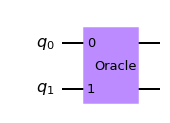

In [3]:
ckt=QuantumCircuit(2)
oracle=dj_oracle('balanced',1)
ckt.append(oracle,[0,1])
ckt.draw()

**Define Deutsch-Jozsa Algorithm**

In [4]:
def dj_algorithm(n,case='random'):
    # Create a Quantum Circuit
    dj_circuit=QuantumCircuit(n+1,n)
    # Apply hadamrd to all qubits
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Make the last qubit in |-> state
    dj_circuit.x(n)
    dj_circuit.h(n)
    # Append Oracle Gate
    if case == 'random':
        output=rd.randint(2)
        if output == 0 :
            case = 'constant'
        else :
            case = 'balanced'
    oracle = dj_oracle(case,n)
    dj_circuit.append(oracle,range(n+1))
    # Finally perform H Gates
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)
    return dj_circuit

**Basic Circuit Diagram**

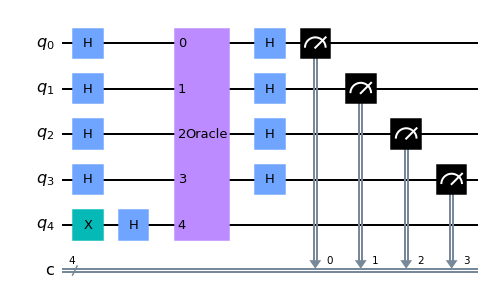

In [5]:
n=4
dj_circuit=dj_algorithm(n)
dj_circuit.draw()

**Run On Local Machine**

{'1111': 1024}


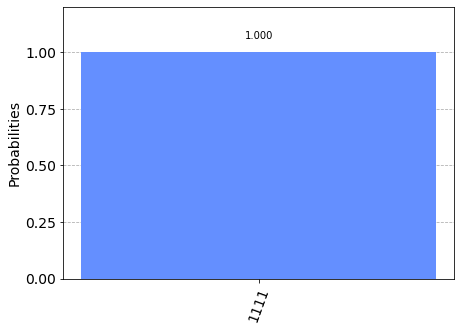

In [6]:
n=4
simulator=Aer.get_backend('qasm_simulator')
dj_circuit=dj_algorithm(n,'balanced')
results=execute(dj_circuit,backend=simulator,shots=1024).result()
counts=results.get_counts()
print(counts)
plot_histogram(counts)
# if all qubits are 0 : constant
# either : balanced

**Run on Quantum Computer**

In [7]:
provider = IBMQ.load_account()

In [8]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
backend=least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational==True))
print("backend used : ",backend)
dj_circuit=dj_algorithm(4,'balanced')
job=execute(dj_circuit,backend=backend,shots=1024,optimization_level=3)

backend used :  ibmq_belem


{'0000': 16, '0001': 43, '0010': 7, '0011': 41, '0100': 4, '0101': 7, '0110': 7, '0111': 36, '1000': 2, '1001': 7, '1010': 3, '1011': 25, '1100': 39, '1101': 101, '1110': 43, '1111': 643}


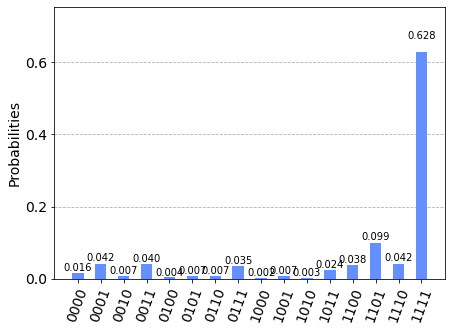

In [9]:
results=job.result()
counts=results.get_counts()
print(counts)
plot_histogram(counts)